# Selenium

### 기본 동작 확인 하기

In [4]:
# import selenium
from selenium import webdriver
import time
import requests
from selenium.webdriver.common.keys import Keys

In [5]:
path = 'C:/Users\good\Desktop\chromedriver.exe' ## 크롬드라이브 경로 지정
driver = webdriver.Chrome(path)

In [6]:
#3초간 쉬는 명령어
time.sleep(3) # = driver.implicitly_wait(3)
# naver에 접속한다
driver.get("https://naver.com")

In [7]:
# 현재 페이지 확인
print(driver.current_url)
# 크롬에서 주소창위에 나오는 이름
print(driver.title)

https://www.naver.com/
NAVER


In [8]:
#해당 사이트 제목이 NAVER인지 확인
assert 'NAVER' in driver.title

In [9]:
#사이트의 title이 다르면 Error 메시지가 뜬다.
assert 'Google' in driver.title 

AssertionError: 

In [15]:
#스크린샷 기능
driver.save_screenshot('chrome.png')

True

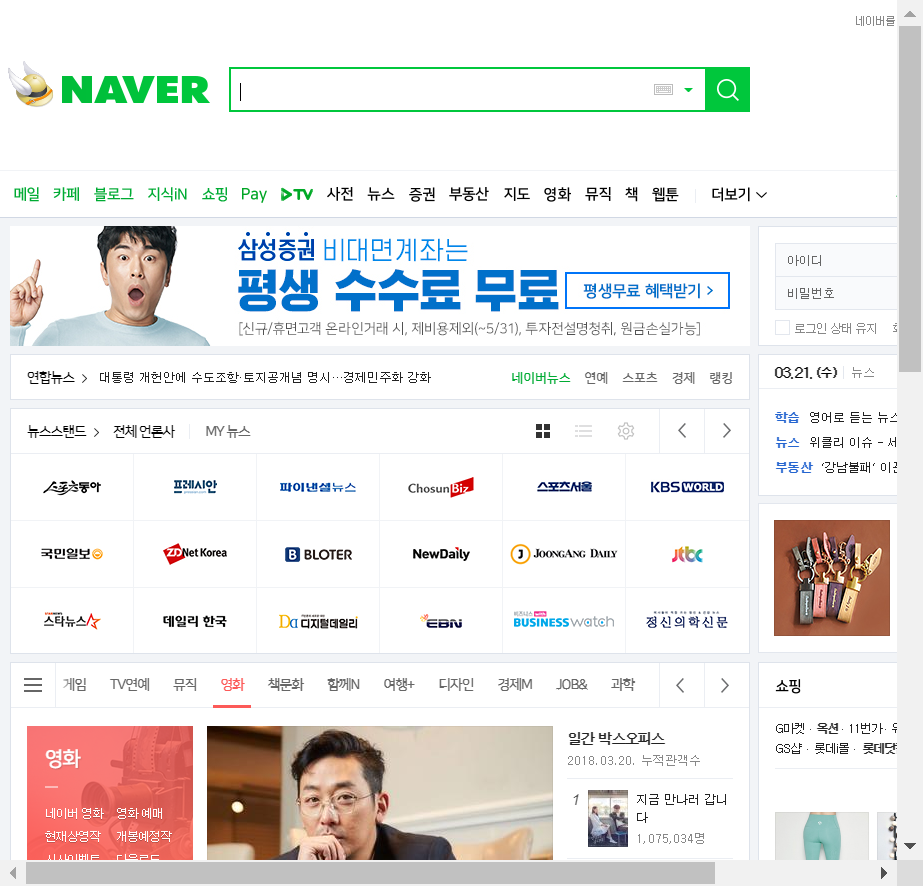

In [16]:
from PIL import Image
im = Image.open('chrome.png')
im

In [12]:
# daum홈페이지로 이동
driver.get("https://www.daum.net")

In [13]:
#뒤로가기
driver.back()

In [12]:
#앞으로 가기
driver.forward()

In [17]:
#새로고침
driver.refresh()

### 검색 해보기

In [18]:
driver.get("https://www.naver.com")
search = driver.find_element_by_id('query')  # 검색어 바에 접근 

In [19]:
search.send_keys("손흥민") # 검색어 입력

In [20]:
search.submit() # 엔터 키 누르기

### 다음 뉴스 기사 가져오기

In [21]:
# 다음 뉴스기사를 가져와보자
# 마우스 오른쪽 버튼을 눌러 검사(Ctrl+Shift+i)를 누르면 나온다.
# Ctrl + Shift + C 를 누르고 뉴스부분을 찍어본다
#class_name이 txt_pctop 로 지정되어 있다.
driver.get("https://www.daum.net")

In [22]:
#왜 여러개가 나오는 걸까?
driver.find_elements_by_class_name('txt_pctop')
#elements -->element 로 하면 맨 앞에 것 하나만 나온다.

[<selenium.webdriver.remote.webelement.WebElement (session="c9ce05d41bc5f1d5de1718881e3a981a", element="0.574982828076136-1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c9ce05d41bc5f1d5de1718881e3a981a", element="0.574982828076136-2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c9ce05d41bc5f1d5de1718881e3a981a", element="0.574982828076136-3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c9ce05d41bc5f1d5de1718881e3a981a", element="0.574982828076136-4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c9ce05d41bc5f1d5de1718881e3a981a", element="0.574982828076136-5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c9ce05d41bc5f1d5de1718881e3a981a", element="0.574982828076136-6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c9ce05d41bc5f1d5de1718881e3a981a", element="0.574982828076136-7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c9ce05d41bc5f1d5de1718881e3a981a", element="

In [23]:
#첫 번째 무엇이 들어 있는지 확인을 해보자.
driver.find_elements_by_class_name('txt_pctop')[0].text

'카페'

In [24]:
# 뉴스는 3번째에 있으니까 선택한 다음 click를 하면 되겠다.
driver.find_elements_by_class_name('txt_pctop')[2].click()

In [26]:
driver.find_element_by_class_name('tit_g').click() # 메인 페이지 기사를 클릭

In [27]:
a = driver.find_elements_by_class_name("article_view") # 여기에 기사 본문이 있다

In [28]:
a[0].text # 이런식으로 모아 적당한 텍스트처리 후 저장하면 되겠다

'(서울=연합뉴스) 황광모 기자 = 청와대 조국 민정수석(가운데)이 21일 오전 춘추관 대브리핑실에서 문재인 대통령이 발의할 개헌안 중 \'지방분권\'과 \'경제부분\'을 설명하고 있다. 왼쪽부터 진성준 정무기획비서관, 조 수석, 김형연 법무 비서관. 2018.3.21\n(서울=연합뉴스) 안 희 기자 = 청와대가 21일 공개한 문재인 대통령 개헌안에서 \'수도에 관한 사항을 법률로 정한다\'는 조항이 신설된 점을 놓고 법조계와 법학계에서는 논란이 다시 불붙고 있다.\n수도를 법률로 정해 정책적 유연성을 높이고 다양한 개념의 중심지를 규정할 수 있도록 외연을 넓히는 한편 지방분권을 실현하겠다는 강력한 의지를 반영했다는 긍정적 평가와 \'수도 서울\'을 헌법에 명시하지 않은 것은 서울을 언제든지 포기할 수 있다는 뜻이어서 소모적 국론분열을 부추길 수 있다는 비판론이 맞서고 있다.\n청와대가 이날 개헌안의 \'헌법 총강\'에 수도조항을 넣기로 한 것은 2004년 헌법재판소의 \'행정수도 이전 위헌\' 결정을 고려한 것으로 풀이된다.\n헌재는 노무현 정부 당시인 2004년 10월 헌재는 행정수도를 충청권으로 이전하기 위한 근거법인 \'신행정수도의 건설을 위한 특별조치법(신행정수도 특별법)\'에 대해 위헌 결정을 내렸다.\n개헌 없이 수도를 옮기겠다는 뜻이어서 국민투표권을 침해한다는 취지였다.\n당시 헌재가 내놓은 핵심 법리는 헌법에 명문화되지 않은 이른바 관습헌법(불문헌법)이었다.\n서울이 수도라는 점은 헌법에 명시돼 있지 않지만, 조선왕조 이래 600여 년간 오랜 관습에 의해 형성된 규범, 즉 관습헌법이며 이를 개헌으로 바꾸지 않은 채 수도를 옮기려는 것은 위헌적이라는 판단이었다.\n특별법에 나온 \'행정수도\'는 주요 헌법기관과 중앙행정기관을 모두 옮기는 곳으로 정의돼 있어 사실상 \'천도(遷都)\'와 다름없다는 해석을 전제로 삼았다.\n당시 헌재 결정을 두고 한동안 논란이 있었다. 관습헌법의 효력을 인정해야 할지, 관습헌법만을 근거로 위헌 결정을 내릴 수 있는지

### 네이버 로그인 해보기

In [29]:
#네이버 로그인 해보기.
#[아이디], [비밀번호 ] [로그인] 3가지의 id, class_name을 알면 가능.

driver.get('https://nid.naver.com/nidlogin.login')

your_id = ""
password = ""

In [31]:
element_id=driver.find_element_by_id("id") #id 텍스트 입력 상자
element_id.clear() # 해당 부분을 지워둬라 
element_pw=driver.find_element_by_id("pw") #비밀번호 텍스트 입력 상자
element_pw.clear()
element_et=driver.find_element_by_class_name('btn_global')

In [32]:
element_id.send_keys(your_id) #아이디 입력
element_pw.send_keys(password) #비밀번호 입력

In [33]:
element_et.submit() #로그인 버튼 클릭

In [34]:
#메일 페이지 열기
driver.find_element_by_class_name('an_icon').click()

In [30]:
#class_name 이나 id만으로도 충분히 찾을 수 있다.
titles=driver.find_elements_by_class_name('mail_title')

In [31]:
titles[1].text

'Follow Kim Sangmin, 꿍꾸 and tvN(티비엔) on Twitter!'

In [32]:
#특정 글자가 들어간 것들을 모두 찾음
a = driver.find_elements_by_partial_link_text("광고")

In [35]:
a[2].text

'(광고)스마일페이로 배스킨라빈스 최애맛을 듬뿍! 매장 FREE 사이즈업 혜택'

### 이미지 크롤링 해보기

In [36]:
import urllib.request
driver = webdriver.Chrome(path)
driver.get("https://google.co.kr")
search = driver.find_element_by_class_name('gsfi')

In [37]:
# 검색 진행
search.send_keys("IOI")

In [38]:
search_btn=driver.find_element_by_class_name('jsb').find_element_by_tag_name('input')
search_btn.click()

In [39]:
# 이미지 페이지로 이동
image_btn=driver.find_elements_by_class_name('q')
image_btn[1].click()

In [ ]:
k = 0
numb_pagedown = 2
elm = driver.find_element_by_tag_name('html')
for i in range(numb_pagedown):
    images = driver.find_elements_by_class_name('rg_ic')
    for image in images:
        try:
            source = image.get_attribute('src')
            urllib.request.urlretrieve(source, "shot" + str(k) + '.png')
        except:
            None
        k = k + 1
    elm.send_keys(Keys.END)
    time.sleep(0.5) 

### 참고 : 멀티프로세싱을 이용한 크롤링 

In [2]:
## 프로세스는 CPU코어(Hyper-Thread인 경우 2배) 개수의 2배(ex: 4코어 i5는 8개, 4코어8스레드인 i7은 16개)로 하면 좋다.
## 출처 : https://beomi.github.io/
from bs4 import BeautifulSoup as bs
import multiprocessing

In [40]:
## 하나씩 크롤링 하기
start_time = time.time()

def get_links(): # 블로그의 게시글 링크들을 가져옵니다.
    req = requests.get('https://beomi.github.io/beomi.github.io_old/')
    html = req.text
    soup = bs(html, 'html.parser')
    my_titles = soup.select(
        'h3 > a'
        )
    data = []

    for title in my_titles:
        data.append(title.get('href'))
    return data

def get_content(link):
    abs_link = 'https://beomi.github.io'+link
    req = requests.get(abs_link)
    html = req.text
    soup = bs(html, 'html.parser')
    # 가져온 데이터로 뭔가 할 수 있겠죠?
    # 하지만 일단 여기서는 시간만 확인해봅시다.
    print(soup.select('h1')[0].text) # 첫 h1 태그를 봅시다.

if __name__=='__main__':
    start_time = time.time()
    for link in get_links():
        get_content(link)
    print("--- %s seconds ---" % (time.time() - start_time))

나만의 웹 크롤러 만들기(4): Django로 크롤링한 데이터 저장하기
나만의 웹 크롤러 만들기(3): Selenium으로 무적 크롤러 만들기
Django에 Social Login 붙이기: Django세팅부터 Facebook/Google 개발 설정까지
Django에 Custom인증 붙이기
나만의 웹 크롤러 만들기(2): Login with Session
나만의 웹 크롤러 만들기 with Requests/BeautifulSoup
Celery로 TelegramBot 알림 보내기
Virtualenv/VirtualenvWrapper OS별 설치&이용법
[DjangoTDDStudy] #02: UnitTest 이용해 기능 테스트 하기
[DjangoTDDStudy] #01: 개발환경 세팅하기(Selenium / ChromeDriver)
[DjangoTDDStudy] #00: 스터디를 시작하며
Fabric Put 커맨드가 No Such File Exception을 반환할 때 해결법
CKEditor의 라이센스와 오픈소스 라이센스
ReactNative The Basis 번역을 끝냈습니다.
[React Native 번역]#01: 시작하기
[번역] 장고(Django)와 함께하는 Celery 첫걸음
Chrome Native Adblockr 대체하기
CustoMac 설치 분투기
Ubuntu14.04에 OhMyZsh 설치
Ubuntu14.04에서 pip로 mysqlclient 설치 실패시
Ubuntu14.04에서 Python3기반 virtualenvwrapper 설치
mac OS X에서 pip virtualenvwrapper 설치 시 uninstalling six 에서 Exception 발생 시
Fabric for Python3 (Fabric3)
Windows에서 pip로 mysqlclient 설치 실패시(python3.4/3.5)
맥에서 윈도RDP로 접속시 한영전환하기.
pip로 mysqlclient설치 중 mac os x에서 egg_info / OSError 발생시 대처방법
--- 

In [1]:
## Multiprocessing으로 병렬 크롤링
## 인터프리터에서 실행 X
start_time = time.time()

def get_links(): # 블로그의 게시글 링크들을 가져옵니다.
    req = requests.get('https://beomi.github.io/beomi.github.io_old/')
    html = req.text
    soup = bs(html, 'html.parser')
    my_titles = soup.select(
        'h3 > a'
        )
    data = []

    for title in my_titles:
        data.append(title.get('href'))
    return data

def get_content(link):
    abs_link = 'https://beomi.github.io'+link
    req = requests.get(abs_link)
    html = req.text
    soup = bs(html, 'html.parser')
    # 가져온 데이터로 뭔가 할 수 있겠죠?
    # 하지만 일단 여기서는 시간만 확인해봅시다.
    print(soup.select('h1')[0].text) # 첫 h1 태그를 봅시다.

if __name__=='__main__':
    start_time = time.time()
    pool = multiprocessing.Pool(processes=4) # 4개의 프로세스를 사용합니다.
    pool.map(get_content, get_links()) # get_content 함수를 넣어줍시다.
    print("--- %s seconds ---" % (time.time() - start_time))

NameError: name 'time' is not defined